# Vorhersage von Herzkrankheiten mittels Machinelles Lernen

Dieses Jupyter Notebook verwendet Python-basierte Machine Learning und Data Science Bibliotheken, um ein Machine Learning Modell zu erstellen, welches in der Lage ist zu bestimmen, ob jemand eine Herzkrankheit hat, basierend auf ihren klinischen Daten.

Wir werden folgenden Ansatz anwenden:
1. Definitiion des Problems
2. Daten
3. Evaluation
4. Features
5. Modellierung
6. Experimentierung

## Definition des Problems

Gegeben sei eine Menge an klinischen Daten einer/eines Patientin/Patienten. Ist es möglich zu bestimmen, ob die/der Patient/in eine Herzkrankheit hat?

## Daten

Die Daten stammen ursprünglich aus Cleveland Data von der UCI Machine Learning Repository. Außerdem existiert eine Version dieses Datensatzes auf Kaggle.

## Evaluation

Wenn wir 95% Treffsicherheit bei der Bestimmung, ob ein/eine Patient/in eine Herzkrankheit hat während des Proof of Concepts, dann verfolgen wir das Projekt weiter.

## Features

**Erstelle eine Daten-Dictionary:**

* age: (Alter des Patienten in Jahren)
* sex:
    - 1: Männlich
    - 0: Weiblich
* cp: Typ der Brustschmerzen
    - 0: typical angina
    - 1: atypical angina
    - 2: non-anginal
    - 3: asymptomatic
* trestbps: Blutdruck in Ruhe (in mm Hg bei Aufnahme ins Krankenhaus)
* chol: Serum Cholesterol in mg/dl
* fbs: Ob Blutzucker (nüchtern) > 120 mg/dl)
* restecg: EKG-Befund in Ruhe
    - 0: Normal
    - 1: ST-T Wellen-Anomalien
    - 2: Mögliche oder definitive linke ventrikuläre Hypertrophie
* thalach: Maximal erreichte Herzfrequenz
* exang: exercise-induced angina
    - 0: Nein (False)
    - 1: Ja (True)
* oldpeak: ST depression induced by exercise relative to rest
* slope: Die Steigung der Spitzenleistung im ST Segment
    - 0: Steigend: Bessere Herzrate bei Übung (selten)
    - 1: Stagnierend: Minimale Veränderung (typische Herzrate)
    - 2: Fallend: Indiz für ungesundes Herz
* ca: Anzahl großer Gefäße (0-3) gefärbt durch Fluroskopie
    - Gefärbte Gefäße bedeuten, dass das Blut beim Durchfluss sichtbar ist
    - Je mehr Blutfluss, desto besser.
* thal: Thalium Stress Ergebnis
    - 3: Normal
    - 6: Fixed Defect
    - 7: Reversible Defect
* target: Ob der/die Patient/in eine Krankheit hat
    - 0: Nein
    - 1: Ja

## Vorbereiten der Tools

Wir verwenden pandas, Matplotlib und NumPy für die Datenanalyse und -manipulation verwenden.

In [134]:
# Importieren aller Bibliotheken, die verwendet werden

# Reguläre EDA (exploratory data analysis) und Plotting Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Modelle von SciKit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Modell Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

## Laden der Daten

In [10]:
df = pd.read_csv("data/heart-disease.csv")
df.shape

(303, 14)

## Datenexploration

Ziel dieses Schritts ist es mehr über die Daten herauszufinden und ein Experte des Datensatzes zu werden.

1. Welche Frage(n) möchten wir beantworten?
2. Welche Arten von Daten haben wir und wie behandeln wir unterschiedliche Datentypen?
3. Was fehlt in den Daten und wie gehen wir damit um?
4. Wo sind die Ausreißer und wieso sollten wir uns damit beschäftigen?
5. Wie können wir Features hinzufügen, verändern oder entfernen, um mehr aus den Daten zu gewinnen?

In [14]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [16]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
df['target'].value_counts().plot(kind='bar', color=['salmon','lightblue']);

NameError: name 'df' is not defined

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [22]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Abhängigkeit zwischen Herzkrankheit und Geschlecht

In [27]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [32]:
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


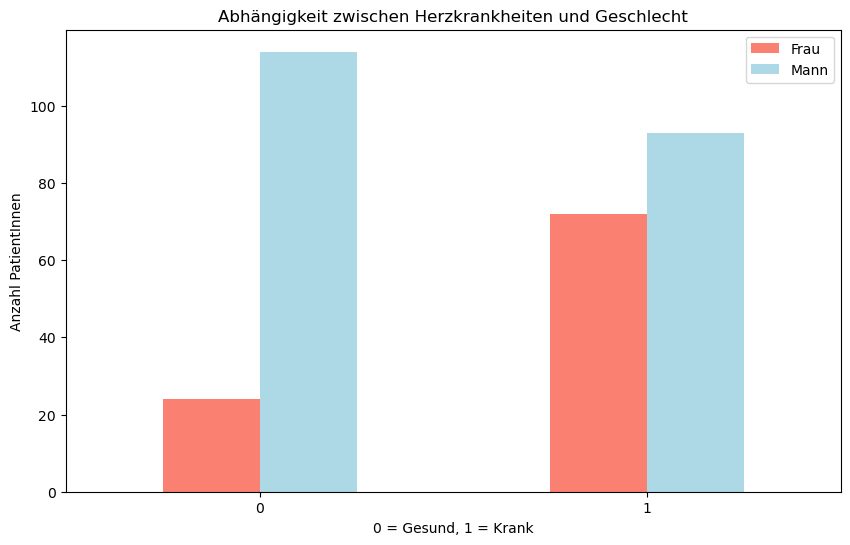

In [44]:
# Erstellen eines Plots für Crosstab

pd.crosstab(df['target'], df['sex']).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightblue'])

plt.title('Abhängigkeit zwischen Herzkrankheiten und Geschlecht')
plt.xlabel('0 = Gesund, 1 = Krank')
plt.ylabel('Anzahl PatientInnen')
plt.legend(['Frau', 'Mann'])
plt.xticks(rotation=0);

In [46]:
df['thalach'].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

## Alter vs. Maximale Herzrate bei Herzkrankheiten

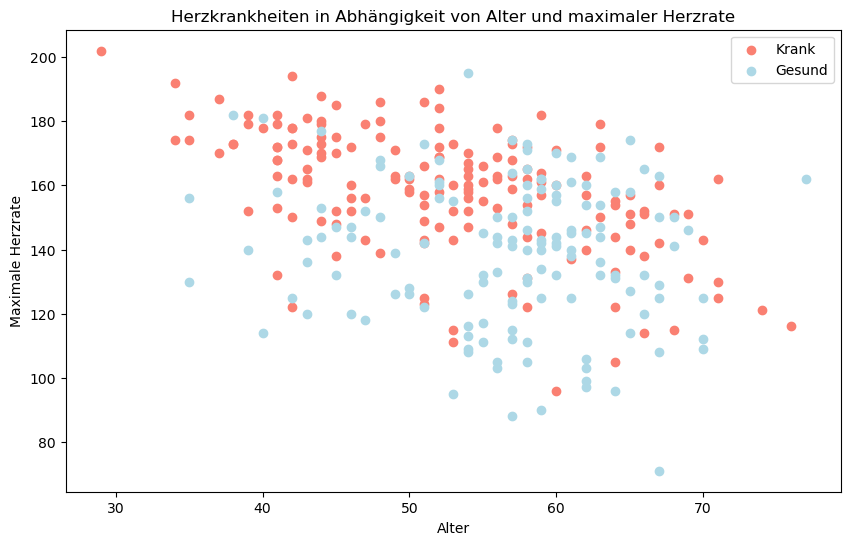

In [53]:
# Erstellen eines neuen Plots

plt.figure(figsize=(10, 6))

# Scatterplot mit den positiven Beispielen (krank)
plt.scatter(df['age'][df['target']==1], df['thalach'][df['target']==1], c='salmon');

# Scatterplot mit den negativen Beispielen (gesund)
plt.scatter(df['age'][df['target']==0], df['thalach'][df['target']==0], c='lightblue');

# Hinzunahme von wichtigen Informationen
plt.title('Herzkrankheiten in Abhängigkeit von Alter und maximaler Herzrate')
plt.xlabel('Alter')
plt.ylabel('Maximale Herzrate')
plt.legend(['Krank', 'Gesund']);

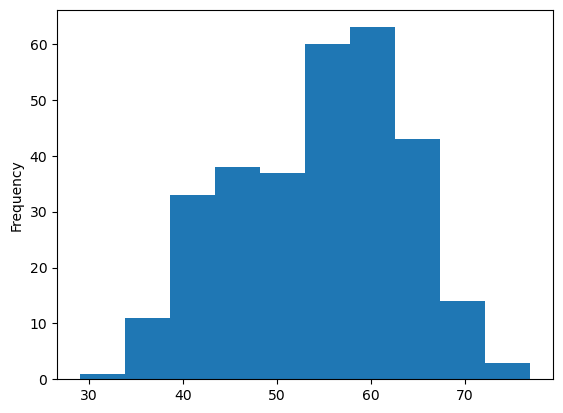

In [56]:
# Überprüfung der Altersverteilung mit einem Histogramm
df['age'].plot.hist();

## Herzkrankheiten in Abhängikeit von Brustschmerzen

In [58]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


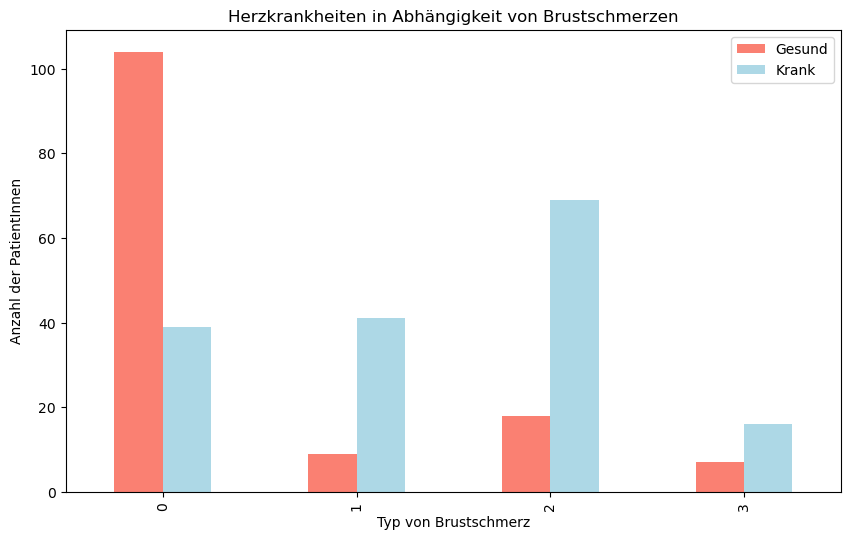

In [60]:
# Crosstab visuell interpretierbarer gestalten
pd.crosstab(df['cp'], df['target']).plot(kind='bar',
                                        figsize=(10,6),
                                        color=['salmon', 'lightblue'])

# Hinzunahme wichtiger Informationen
plt.title('Herzkrankheiten in Abhängigkeit von Brustschmerzen')
plt.xlabel('Typ von Brustschmerz')
plt.ylabel('Anzahl der PatientInnen')
plt.legend(['Gesund', 'Krank']);

In [40]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


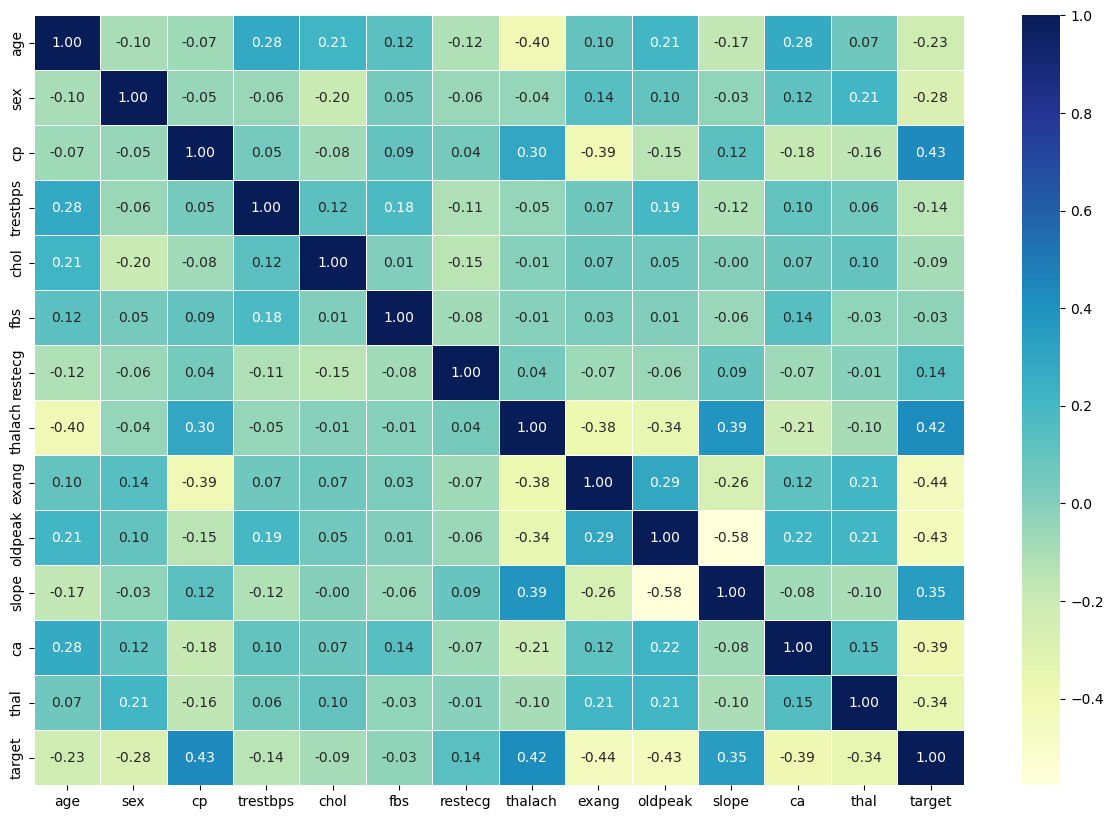

In [61]:
# Erstellung einer besser interpretierbaren Visualisierung der Korrelationsmatrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt='.2f', cmap='YlGnBu');

In [63]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Modellierung

In [66]:
# Daten in X und y splitten
X = df.drop('target', axis=1)
y = df['target']

np.random.seed(42)

# Daten in Trainings- und Testdaten splitten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Da wir nun endlich unsere Daten in Training- und Testdaten gesplittet haben, können wir ein Machine Learning Modell erstellen.
Dabei trainieren wir (finden Muster) auf den Trainingsdaten und testen (verwenden die Muster) auf den Testdaten.

Wir werden drei verschiedene Machine Learning Modelle probieren:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [68]:
# Lagern der Modelle in einer Dictionary
models = {"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Erstellen einer Funktion, welche die Modelle trainiert und evaluiert.
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Trainiert und evaluiert eine Dictionary von Machine Learning Modellen
    models: eine Dictionary von unterschiedlichen SciKit-Learn Machine Learning Modellen
    X_train: Trainingsdaten (ohne Labels)
    X_test: Testdaten (ohne Labels)
    y_train: Trainingslabels
    y_test: Testlabels
    """
    
    # Random Seed setzen
    np.random.seed(42)
    
    # Erstelle eine leere Dictionary, um die Scores der einzelnen Modelle zu speichern.
    model_scores = {}
    
    # Iteration durch alle Modelle
    for name, model in models.items():
        # Modell mit Trainingsdaten trainieren
        model.fit(X_train, y_train)
        # Evaluation des Modells mit Trainingsdaten
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [70]:
model_scores = fit_and_score(models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

model_scores

C:\Users\jabhe\Desktop\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Modell-Vergleich

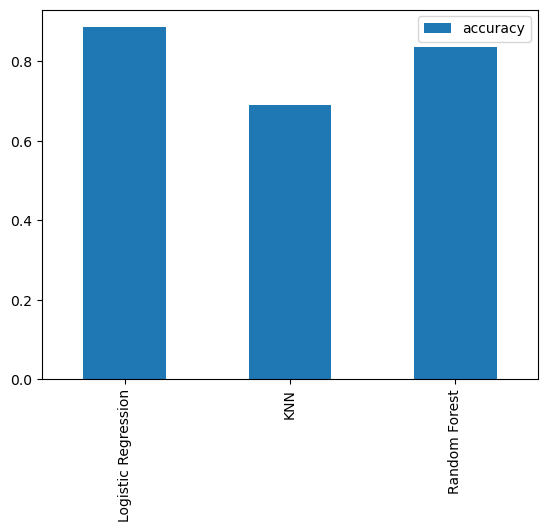

In [75]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot(kind='bar');

Da wir nun unsere Baseline-Modelle trainiert und evaluiert haben und wir wissen, dass die erste Vorhersage eines Modells nicht die Beste ist, können wir uns folgende Punkte anschauen:

* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1 Score
* Classification Report
* Receiver Operating Characteristic (ROC) Curve
* Area Under Curve (AUC)

### Hyperparameter Tuning (manuell)

In [77]:
# KNN Tuning

train_scores = []
test_scores = []

# Erstellen einer Liste von unterschiedlichen neighbors-Werten für KNN
neighbors = range(1,21)

# KNN Instanziieren
knn = KNeighborsClassifier()

# Iteration durch verschiedene neighbors-Werte
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Modell mit neighbors-Wert trainieren
    knn.fit(X_train, y_train)
    
    # Aktualisieren der train_scores Liste
    train_scores.append(knn.score(X_train, y_train))
    
    # Aktualisieren der test_scores Liste
    test_scores.append(knn.score(X_test, y_test))

In [79]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [80]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximales KNN-Ergebnis auf den Testdaten: 75.41%


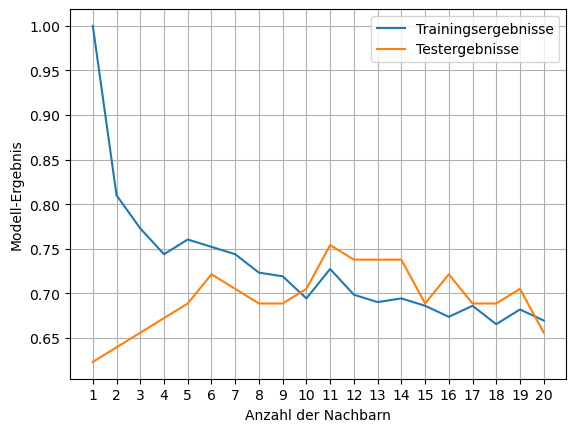

In [85]:
plt.plot(neighbors, train_scores, label='Trainingsergebnisse')
plt.plot(neighbors, test_scores, label='Testergebnisse')
plt.grid(True)
plt.xticks(np.arange(1,21,1))
plt.xlabel('Anzahl der Nachbarn')
plt.ylabel('Modell-Ergebnis')
plt.legend()

print(f"Maximales KNN-Ergebnis auf den Testdaten: {max(test_scores)*100:.2f}%");

## Hyperparameter Tuning mit RandomizedSearchCV

Dabei tunen wir:
* LogisticRegression
* RandomForestClassifier

... mit RandomizedSearchCV

In [99]:
# Erstellen eines Hyperparameter Grids für LogisiticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
               'solver': ['liblinear']}

# Erstellen eines Hyperparameter Grids für RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1, 20, 2)}

In [90]:
# Tunen von LogisticRegression
np.random.seed(42)

# Zufällige Hyperparametersuche für LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Trainieren des zufälligen Hyperparametersuch-Modells für LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [92]:
# Suchen der besten Parameter
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [94]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Nun haben wir LogisticRegression() getuned. Jetzt nochmal für RandomForestClassifier()

In [102]:
# Random Seed setzen
np.random.seed(42)

# Zufaellige Hyperparametersuche fuer RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                          verbose=True)

# Trainieren der zufaelligen Hyperparametersuche fuer RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [103]:
# Suchen der besten Parameter
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [108]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparameter Tuning mit GridSearchCV

Da unser Logistic Regression Modell die besten Werte liefert, versuchen wir das Modell mit GridSearchCV zu verbessern.

In [111]:
# Verschiedene Hyperparameter für unser Logistic Regression Modell
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               'solver': ['liblinear']}

# Grid Einstellungen für Logisitic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv=5,
                         verbose=True)

# Trainiere das Hyperparameter Grid Modell
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [114]:
# Beste Hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [115]:
# Evaluation des GridSearch Logistic Regressions Modell
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluation unseres getuneten Machine Learning Classifier neben der Treffsicherheit

* ROC Curve und AUC Wert
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 Score

... und es wäre gut, wenn Cross-Validation wo auch immer möglich verwendet wird.

Um Vergleiche durchzuführen und unser trainiertes Modell zu evaluieren, müssen wir zuerst Predictions durchführen.

In [118]:
# Vergleiche mit tuned Modell

y_preds = gs_log_reg.predict(X_test)

In [120]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [124]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

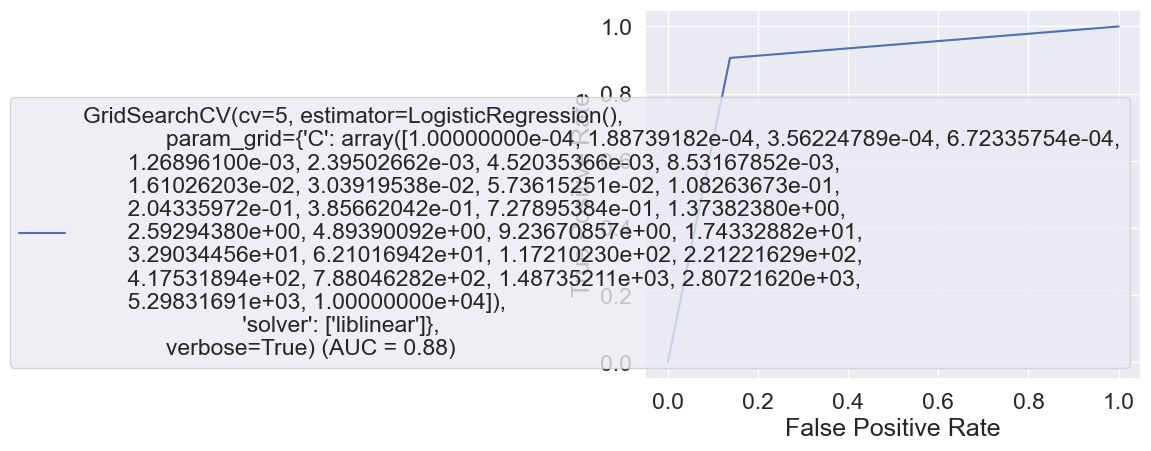

0.8841594827586207

In [142]:
# Plotten der ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=gs_log_reg)
display.plot()
plt.show();
roc_auc

In [139]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


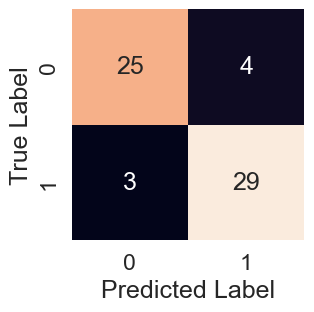

In [141]:
#
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    '''
    Plottet eine schöne Confusion Matrix mit Seaborn's Heatmap-Funktion
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label');
    
plot_conf_mat(y_test, y_preds)

Nun haben wir eine ROC Curve, AUC und eine Confusion Matrix. Nun erstellen wir ein Classification Report und eine Cross-Validated Precision, Recall und F1-Score.

In [145]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [147]:
# Ueberpruefe beste Hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [148]:
# Erstelle neuen Classifier mit beste Params
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [154]:
# cross-validated acc
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [155]:
# cross-validated precision
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='precision')
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [160]:
# cross-validated recall
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='recall')
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [158]:
# cross-validated f1 score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='f1')
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [161]:
cv_acc.mean(), cv_precision.mean(), cv_recall.mean(), cv_f1.mean()

(0.8446994535519124,
 0.8207936507936507,
 0.9212121212121213,
 0.8673007976269721)

In [165]:
# Visualisieren der cross validated Metriken

cv_metrics = pd.DataFrame({'Accuracy': cv_acc.mean(),
                          'Precision': cv_precision.mean(),
                          'Recall': cv_recall.mean(),
                          'F1-Score': cv_f1.mean()},
                         index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1-Score
0,0.844699,0.820794,0.921212,0.867301


In [6]:
cv_metrics.T.plot.bar(title='Cross-Validated Classifcation Metrics', legend=False);

NameError: name 'cv_metrics' is not defined

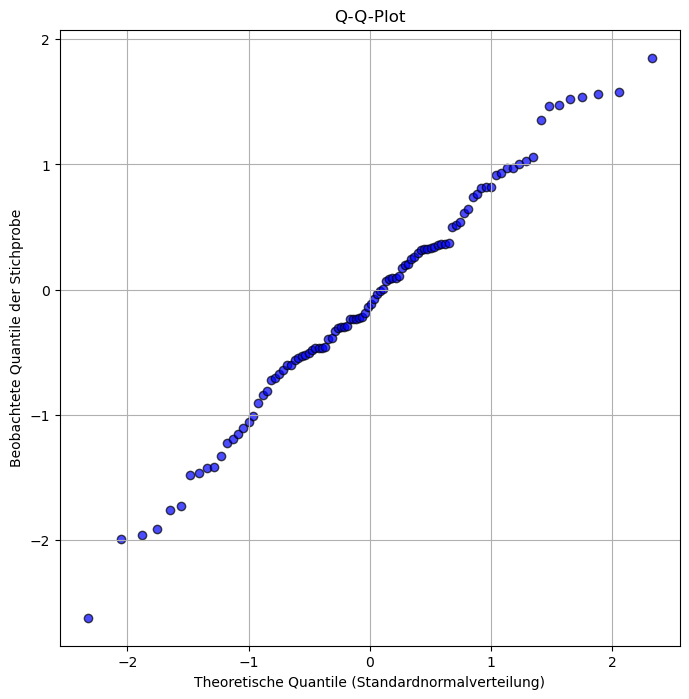

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Stichprobe aus einer normalverteilten Population generieren
np.random.seed(42)
sample_data = np.random.normal(loc=0, scale=1, size=100)

# Q-Q-Plot erstellen
sorted_data = np.sort(sample_data)
theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, 100))

plt.figure(figsize=(8, 8))
plt.scatter(theoretical_quantiles, sorted_data, color='blue', edgecolors='k', alpha=0.7)
plt.title('Q-Q-Plot')
plt.xlabel('Theoretische Quantile (Standardnormalverteilung)')
plt.ylabel('Beobachtete Quantile der Stichprobe')
plt.grid(True)
plt.show()